# Comparison between true labels and shuffled labels accuracy (subject wise and mean) for decision and response.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

In [2]:
'''cell only for reading time labels'''
from toolbox.methods import read_data
all_epochs, all_rawdata = read_data(amount_of_subjects=1,task='main',resample=True,resample_frequency=50)
time_labels = all_epochs[0].times
print(time_labels.shape)

Frequency before: 500.0
Frequency after: 50.0
(288,)


In [3]:
'''Variables'''
sigma = 2 # for gaussian filter. Sigma 1 seems to have a lot of peaks still so I increased it to 2
timepoints = time_labels.shape[0]

In [13]:
df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'time', 'accuracy'])
data = np.load('results_resp_svc/timepoint_response_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint, 
            'time': time_labels[timepoint],
            'accuracy': data[subject][timepoint], 
            'shuffled': 'No'
            })


mean_data = np.zeros((26, timepoints))
for experiment in range(2,3):
    data = np.load('results_resp_svc/timepoint_response_shuffled_{}.npy'.format(experiment), allow_pickle=True)
    for subject in range(26):
        mean_data[subject] += data[subject]
mean_data /= 1

for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint,
            'time': time_labels[timepoint], 
            'accuracy': mean_data[subject][timepoint], 
            'shuffled': 'Yes'
            })
df_resp = pd.DataFrame(rows)
grouped = df_resp.groupby('subject')
df_resp['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))

In [23]:
df_resp['accuracy'].head()

0    0.52
1    0.52
2    0.52
3    0.52
4    0.52
Name: accuracy, dtype: float64

Text(0.5, 0, 'time (s)')

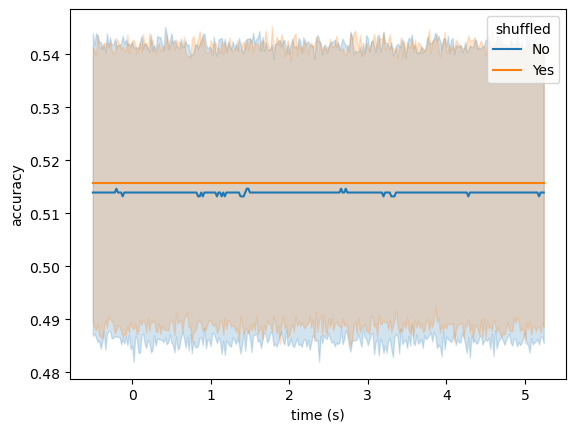

In [21]:
sns.lineplot(x="time", y="accuracy", data=df_resp, hue='shuffled')
plt.xlabel('time (s)')